In [ ]:
# Instal library sentence-transformers untuk mengubah teks menjadi vektor (embedding)
# dan scikit-learn untuk model klasifikasi
!pip install sentence-transformers scikit-learn

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sentence_transformers import SentenceTransformer

# Data latih dari file 'data labeling history sentimen.txt' [cite: 1, 2, 3, 4, 5]
# (text, label)
train_data = [
    ("Pelayanan cepat dan ramah sekali", "positive"),
    ("Makanannya enak dan porsinya pas", "positive"),
    ("Harga murah dan kualitas sangat baik", "positive"),
    ("Tempatnya bersih dan nyaman", "positive"),
    ("Saya puas dengan layanan di restoran ini", "positive"),
    ("Aplikasi mudah digunakan dan tampilannya bagus", "positive"),
    ("Produk sesuai deskripsi dan pengiriman cepat", "positive"),
    ("Sangat direkomendasikan untuk keluarga", "positive"),
    ("Layanan pelanggan cepat tanggap", "positive"),
    ("Tempat parkir luas dan aman", "positive"),
    ("Pelayanannya lama dan tidak ramah", "negative"),
    ("Makanan dingin dan tidak sesuai pesanan", "negative"),
    ("Harga terlalu mahal untuk kualitas seperti ini", "negative"),
    ("Karyawan cuek dan tidak membantu", "negative"),
    ("Saya kecewa dengan pelayanan di sini", "negative"),
    ("Aplikasi sering error dan lambat", "negative"),
    ("Produk rusak saat diterima", "negative"),
    ("Sangat mengecewakan, tidak akan beli lagi", "negative"),
    ("Layanan pelanggan tidak responsif", "negative"),
    ("Tempatnya kotor dan berantakan", "negative"),
    ("Minumannya hambar dan terlalu manis", "negative"),
    ("Kualitas produk buruk sekali", "negative"),
    ("Saya suka rasa dan pelayanannya", "positive"),
    ("Tempat makan favorit saya, selalu puas", "positive"),
    ("Layanan sangat memuaskan", "positive"),
    ("Kualitas makanan menurun dibanding dulu", "negative"),
    ("Harga sebanding dengan rasa", "positive"),
    ("Tidak puas dengan pelayanan restoran ini", "negative"),
    ("Pelayan kurang sopan dan cuek", "negative"),
    ("Sangat puas dengan pelayanan cepatnya", "positive"),
    ("Menu beragam dan rasanya lezat", "positive"),
    ("Pesanan datang terlambat", "negative"),
    ("Makanannya enak tapi pelayanannya lambat", "negative"),
    ("Aplikasinya ringan dan tidak ada bug", "positive"),
    ("Pengiriman cepat tapi packing kurang rapi", "negative"),
    ("Barang sesuai ekspektasi, bagus banget", "positive"),
    ("Kurir tidak sopan dan telat", "negative"),
    ("Harga mahal tapi kualitas sesuai", "positive"),
    ("Restoran ramai tapi pelayanan cepat", "positive"),
    ("Makanan tidak enak dan terlalu asin", "negative"),
    ("Sangat membantu pekerjaan saya", "positive"),
    ("Server sering down dan susah login", "negative"),
    ("Tempat makan nyaman untuk keluarga", "positive"),
    ("Pengalaman buruk, tidak direkomendasikan", "negative"),
    ("Sistem pembayaran sering error", "negative"),
    ("Aplikasi sangat berguna dan efisien", "positive"),
    ("Respon admin sangat cepat dan membantu", "positive"),
    ("Rasanya lezat dan pelayanan luar biasa", "positive"),
    ("Pelayanan buruk, tidak profesional", "negative")
]

# Pisahkan antara teks (X) dan label (y)
texts_train = [item[0] for item in train_data]
labels_train = [item[1] for item in train_data]

print(f"Total data latih: {len(texts_train)} ulasan")

Total data latih: 49 ulasan


In [ ]:
# Muat model Sentence Transformer (model berbasis BERT)
# Kita gunakan 'paraphrase-multilingual-MiniLM-L12-v2' karena bagus untuk banyak bahasa, termasuk Indonesia.
model_embedding = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# Proses 'encoding' mengubah teks menjadi vektor
# Ini mungkin perlu beberapa saat saat pertama kali dijalankan (perlu download model)
print("Mulai membuat embedding untuk data latih...")
X_train_embeddings = model_embedding.encode(texts_train)
print("Selesai!")

# Lihat dimensi vektornya (berapa angka untuk mewakili 1 kalimat)
print(f"Bentuk (shape) dari embedding: {X_train_embeddings.shape}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Mulai membuat embedding untuk data latih...
Selesai!
Bentuk (shape) dari embedding: (49, 384)


In [ ]:
# Inisialisasi model klasifikasi
# Logistic Regression cepat dan bekerja baik untuk tugas ini
classifier = LogisticRegression()

# Latih model!
print("Mulai melatih model Logistic Regression...")
classifier.fit(X_train_embeddings, labels_train)
print("Model sentimen berhasil dilatih!")

Mulai melatih model Logistic Regression...
Model sentimen berhasil dilatih!


In [ ]:
# Siapkan beberapa ulasan baru untuk diuji
reviews_test = [
    "Barangnya bagus, saya suka sekali!",
    "Penjualnya sangat ramah dan responsif",
    "Pengiriman lama banget, barangnya baru sampai seminggu",
    "Kualitas produk sangat mengecewakan, jangan dibeli.",
    "Harga oke, kualitas juga oke"
]

# 1. Ubah ulasan baru menjadi embedding (vektor)
test_embeddings = model_embedding.encode(reviews_test)

# 2. Prediksi sentimennya menggunakan model yang sudah dilatih
predictions = classifier.predict(test_embeddings)

# 3. Tampilkan hasil
print("--- Hasil Prediksi Sentimen ---")
for review, sentiment in zip(reviews_test, predictions):
    print(f"['{review}'] => {sentiment.upper()}")

--- Hasil Prediksi Sentimen ---
['Barangnya bagus, saya suka sekali!'] => POSITIVE
['Penjualnya sangat ramah dan responsif'] => POSITIVE
['Pengiriman lama banget, barangnya baru sampai seminggu'] => NEGATIVE
['Kualitas produk sangat mengecewakan, jangan dibeli.'] => NEGATIVE
['Harga oke, kualitas juga oke'] => POSITIVE


In [ ]:
# Instal BERTopic dan HDBSCAN
# HDBSCAN adalah library clustering yang disarankan di materi
!pip install bertopic hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 6.5 MB/s eta 0:00:00


In [ ]:
# Data dari file 'data non label ecommerce.txt'
reviews_unlabeled = [
    # Produk / Kualitas Barang
    "Barang bagus banget, sesuai deskripsi dan berfungsi dengan baik.",
    "Kualitas produk jelek, cepat rusak setelah dipakai 2 hari.",
    "Produk original dan kemasannya aman, sangat puas.",
    "Barang yang datang berbeda warna dari yang dipesan.",
    "Produk cacat tapi respon penjual cepat dan diganti baru.",
    "Barang palsu! Tidak sesuai iklan di toko.",
    "Kualitas oke tapi tidak seperti ekspektasi.",
    "Barang ringan dan desainnya elegan, suka banget!",
    "Kualitas bahan tipis, tidak sesuai harga.",
    "Barang sangat berkualitas, recommended seller!",

    # Pengiriman
    "Pengiriman cepat banget, dua hari langsung sampai.",
    "Lama banget pengirimannya, sampai seminggu baru datang.",
    "Kurirnya sopan dan ramah.",
    "Paket diterima dalam kondisi rusak, sangat kecewa.",
    "Estimasi pengiriman tidak sesuai, molor terus.",
    "Barang dikirim dengan packing rapi, aman.",
    "Nomor resi tidak bisa dilacak sama sekali.",
    "Sampai lebih cepat dari perkiraan, good job!",
    "Kardus penyok tapi isi aman.",
    "Paket hilang, sudah lapor tapi belum ada respon.",

    # Harga / Promo
    "Harga murah banget untuk kualitas sebagus ini.",
    "Harga terlalu mahal dibanding toko lain.",
    "Promo tidak bisa digunakan, padahal syarat sudah sesuai.",
    "Diskon palsu, harga dinaikkan dulu baru diturunkan.",
    "Harga wajar dan sesuai kualitas.",
    "Harga oke tapi ongkir mahal banget.",
    "Harga naik tiba-tiba waktu checkout.",
    "Harga sesuai deskripsi, transparan dan jujur.",
    "Harga promo benar-benar membantu, terima kasih!",
    "Harga murah tapi kualitas juga murahan.",

    # Customer Service / Penjual
    "Admin cepat tanggap dan sopan.",
    "Respon penjual lama banget, harus follow up terus.",
    "Penjual ramah dan informatif.",
    "CS tidak membantu sama sekali waktu komplain.",
    "Sudah chat tapi tidak dibalas sampai 3 hari.",
    "Customer service profesional dan solutif.",
    "Penjual memblokir setelah komplain, parah banget!",
    "Respon cepat dan membantu cari solusi.",
    "Penjualnya jujur dan fast response.",
    "Layanan pelanggan kurang responsif.",

    # Kemasan / Packing
    "Packing sangat rapi dan aman, bubble wrap tebal.",
    "Tidak ada bubble wrap sama sekali, barang nyaris rusak.",
    "Dikemas dengan baik dan bersih.",
    "Kotak pengiriman kotor dan basah.",
    "Packing rapat, aman dari benturan.",
    "Barang dibungkus asal-asalan, kecewa.",
    "Kemasan simple tapi tetap aman.",
    "Kardus sobek sedikit tapi isi utuh.",
    "Packing cepat dan dikirim hari yang sama.",
    "Tidak disegel, khawatir barang tertukar.",

    # Pengalaman Umum
    "Belanja di toko ini menyenangkan, pelayanan bagus.",
    "Sangat kecewa, pengalaman belanja terburuk.",
    "Sudah sering beli di sini, selalu memuaskan.",
    "Sekali beli langsung kapok, tidak akan ulang lagi.",
    "Proses pembelian mudah dan cepat.",
    "Website error waktu checkout.",
    "Aplikasi sering crash saat pilih metode pembayaran.",
    "Transaksi lancar dan tanpa kendala.",
    "Belanja mudah tapi pengiriman lambat.",
    "Pengalaman campur aduk, ada plus minusnya."
]

print(f"Total data ulasan non-label: {len(reviews_unlabeled)} ulasan")

Total data ulasan non-label: 60 ulasan


In [ ]:
from bertopic import BERTopic

# Tentukan model embedding yang SAMA dengan Langkah 1
embedding_model_name = 'paraphrase-multilingual-MiniLM-L12-v2'

print("Menginisialisasi model BERTopic...")
# Kita set min_topic_size=3 agar bisa menemukan topik
# bahkan dari grup ulasan yang kecil (karena data kita sedikit)
topic_model = BERTopic(
    embedding_model=embedding_model_name,
    language="multilingual",
    min_topic_size=3,  # Minimal 3 ulasan untuk membentuk 1 topik
    verbose=True
)

print("Mulai melatih model BERTopic (fit_transform)...")
# Latih model pada data ulasan non-label
# Ini akan:
# 1. Mengubah semua 60 ulasan menjadi embedding (vektor)
# 2. Mengelompokkan (clustering) ulasan yang mirip
# 3. Mengekstrak kata kunci dari tiap kelompok untuk membuat topik
topics, probabilities = topic_model.fit_transform(reviews_unlabeled)

print("Pelatihan model topik selesai!")

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.
2025-11-02 10:07:30,393 - BERTopic - Embedding - Transforming documents to embeddings.


Menginisialisasi model BERTopic...
Mulai melatih model BERTopic (fit_transform)...


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

2025-11-02 10:07:33,902 - BERTopic - Embedding - Completed ✓
2025-11-02 10:07:33,904 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-02 10:07:42,720 - BERTopic - Dimensionality - Completed ✓
2025-11-02 10:07:42,722 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-02 10:07:42,739 - BERTopic - Cluster - Completed ✓
2025-11-02 10:07:42,755 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-02 10:07:42,777 - BERTopic - Representation - Completed ✓


Pelatihan model topik selesai!


In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', None) # Agar nama topik tidak terpotong

print("--- Topik yang Ditemukan ---")
# Tampilkan 10 topik teratas (atau semua jika kurang dari 10)
# 'get_topic_info()' memberi kita ringkasan semua topik
topic_info = topic_model.get_topic_info()
print(topic_info.head(10))

# --- Penjelasan Hasil ---
# Topic -1: Ini adalah "Outlier". Ulasan di sini tidak cocok
#            masuk ke topik mana pun. Ini normal.
# Topic 0, 1, 2, ...: Ini adalah topik-topik yang ditemukan.
# Count: Jumlah ulasan yang masuk ke topik ini.
# Name: Nama topik yang otomatis dibuat dari kata kunci utamanya.

--- Topik yang Ditemukan ---
   Topic  Count                      Name  \
0     -1      3  -1_cepat_bahan_job_lebih   
1      0     29   0_dan_aman_barang_harga   
2      1     28  1_tidak_banget_hari_tapi   

                                                                Representation  \
0       [cepat, bahan, job, lebih, good, cari, tipis, perkiraan, solusi, dari]   
1  [dan, aman, barang, harga, tapi, kualitas, dengan, packing, sangat, sesuai]   
2       [tidak, banget, hari, tapi, waktu, kecewa, baru, yang, cepat, penjual]   

                                                                                                                                               Representative_Docs  
0                                [Kualitas bahan tipis, tidak sesuai harga., Respon cepat dan membantu cari solusi., Sampai lebih cepat dari perkiraan, good job!]  
1  [Barang dikirim dengan packing rapi, aman., Packing sangat rapi dan aman, bubble wrap tebal., Barang bagus banget, sesuai deskri

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Kita sudah memiliki data dan model dari langkah-langkah sebelumnya:
# - reviews_unlabeled: Daftar 60 ulasan e-commerce
# - model_embedding: Model SentenceTransformer
# - classifier: Model Logistic Regression (untuk sentimen)
# - topic_model: Model BERTopic
# - topics: Daftar ID topik yang diprediksi untuk 'reviews_unlabeled'
# - topic_info: DataFrame informasi topik dari BERTopic

In [ ]:
print("Memprediksi sentimen untuk data non-label...")

# 1. Ubah 60 ulasan menjadi embedding (vektor)
# (Gunakan model embedding yang sama dengan yang kita latih)
unlabeled_embeddings = model_embedding.encode(reviews_unlabeled)

# 2. Prediksi sentimennya
sentiments_pred = classifier.predict(unlabeled_embeddings)

print(f"Prediksi sentimen selesai. Total prediksi: {len(sentiments_pred)}")

Memprediksi sentimen untuk data non-label...
Prediksi sentimen selesai. Total prediksi: 60


In [ ]:
# 'topics' adalah variabel hasil dari 'topic_model.fit_transform(reviews_unlabeled)' di Langkah 2
topics_pred = topics

# Buat pemetaan (mapping) dari ID topik (angka) ke Nama Topik (teks)
# agar mudah dibaca.
# Contoh: 0 -> "0_pengiriman_cepat_lambat..."
topic_map = topic_info.set_index('Topic')['Name'].to_dict()

# Terapkan pemetaan
topic_names = [topic_map[t] for t in topics_pred]

# Buat DataFrame pandas untuk analisis
df_analysis = pd.DataFrame({
    'Ulasan': reviews_unlabeled,
    'Topic_ID': topics_pred,
    'Aspek (Topik)': topic_names,
    'Sentimen': sentiments_pred
})

# Tampilkan 5 baris pertama hasil gabungan
print("--- Hasil Analisis Gabungan ---")
print(df_analysis.head())

--- Hasil Analisis Gabungan ---
                                                             Ulasan  Topic_ID  \
0  Barang bagus banget, sesuai deskripsi dan berfungsi dengan baik.         0   
1        Kualitas produk jelek, cepat rusak setelah dipakai 2 hari.         1   
2                 Produk original dan kemasannya aman, sangat puas.         0   
3               Barang yang datang berbeda warna dari yang dipesan.         1   
4          Produk cacat tapi respon penjual cepat dan diganti baru.         1   

              Aspek (Topik)  Sentimen  
0   0_dan_aman_barang_harga  positive  
1  1_tidak_banget_hari_tapi  negative  
2   0_dan_aman_barang_harga  positive  
3  1_tidak_banget_hari_tapi  negative  
4  1_tidak_banget_hari_tapi  negative  


In [ ]:
print("\n--- Agregasi Sentimen per Aspek ---")

# Kita saring (filter) topik -1, karena itu adalah "Outlier"
# (ulasan yang tidak masuk ke topik mana pun)
df_filtered = df_analysis[df_analysis['Topic_ID'] != -1]

# Lakukan group by dan hitung jumlah sentimen
# unstack() mengubah baris 'Positif'/'Negatif' menjadi kolom
analysis_summary = df_filtered.groupby('Aspek (Topik)')['Sentimen'].value_counts().unstack(fill_value=0)

# Tambahkan kolom 'Total' dan urutkan
analysis_summary['Total'] = analysis_summary.sum(axis=1)
analysis_summary = analysis_summary.sort_values(by='Total', ascending=False)

print(analysis_summary)


--- Agregasi Sentimen per Aspek ---
Sentimen                  negative  positive  Total
Aspek (Topik)                                      
0_dan_aman_barang_harga          7        22     29
1_tidak_banget_hari_tapi        25         3     28


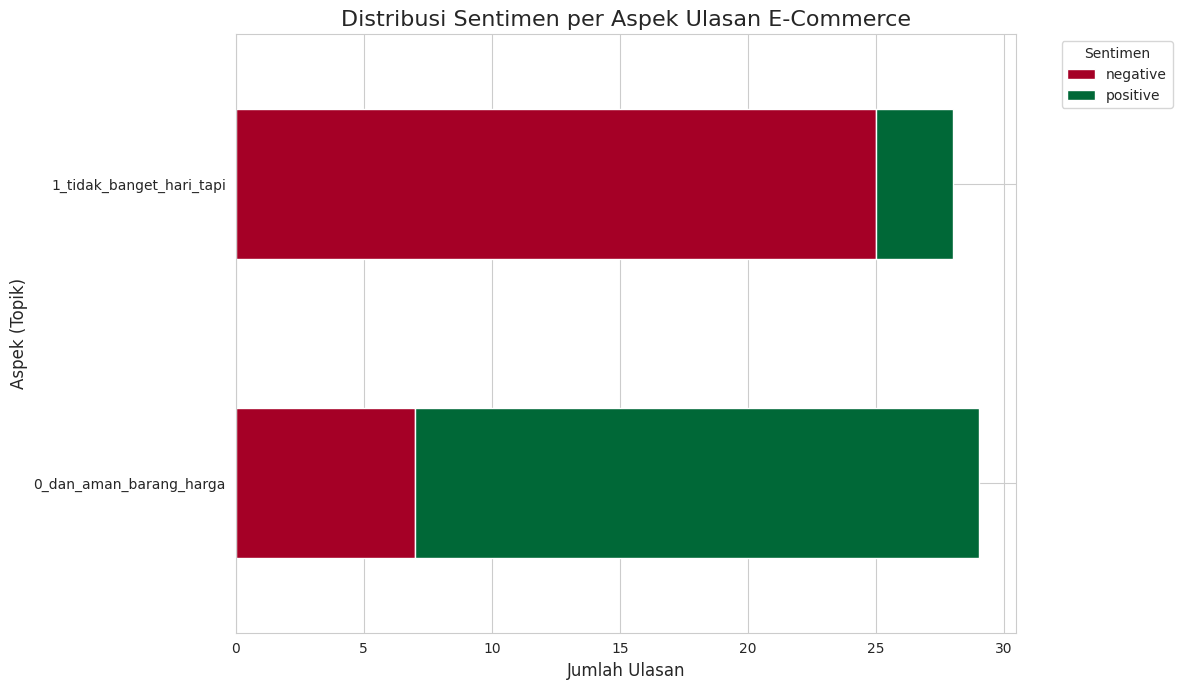

In [ ]:
# Siapkan data untuk di-plot (kita tidak perlu kolom 'Total' di grafik)
plot_data = analysis_summary.drop(columns='Total')

# Buat plot
sns.set_style("whitegrid")
plot_data.plot(
    kind='barh',  # Horizontal bar chart agar nama topik mudah dibaca
    stacked=True,
    figsize=(12, 7),
    colormap='RdYlGn' # 'Merah' (Negatif) ke 'Hijau' (Positif)
)

plt.title('Distribusi Sentimen per Aspek Ulasan E-Commerce', fontsize=16)
plt.xlabel('Jumlah Ulasan', fontsize=12)
plt.ylabel('Aspek (Topik)', fontsize=12)
plt.legend(title='Sentimen', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Laporan Proyek 2: Analisis Sentimen & Topik Ulasan E-Commerce

**Penulis:** [Wahyu Fajar Firmansyah]
**Subjek:** [Project Challenge Assigment] - Tugas Proyek 2 – PRIMA PTKI

---

## 1. Latar Belakang Bisnis

Tim E-Commerce perusahaan mengalami tantangan bisnis yang signifikan, yaitu **penurunan *sales* sebesar -30%** dibandingkan bulan sebelumnya. Evaluasi sebelumnya terhadap strategi periklanan (*ads*) tidak memberikan hasil yang signifikan.

Hal ini mengindikasikan bahwa masalah inti mungkin bukan pada *awareness*, melainkan pada ***customer experience***. Perusahaan menerima banyak ulasan pelanggan yang tidak terstruktur di berbagai platform, namun belum memiliki sistem otomatis untuk menganalisisnya. Akibatnya, tim produk dan layanan tidak tahu aspek spesifik apa yang paling dikeluhkan atau dipuji pelanggan, sehingga keputusan perbaikan masih berdasarkan asumsi.

## 2. Tujuan Proyek

Berdasarkan *business issue* tersebut, tujuan dari proyek ini adalah:

1.  **Mengembangkan sistem analisis sentimen otomatis** untuk memproses ulasan pelanggan e-commerce.
2.  **Mengidentifikasi topik atau aspek spesifik** yang dibicarakan pelanggan dalam ulasan mereka.
3.  **Menentukan distribusi sentimen (positif dan negatif) per aspek** untuk menemukan area kekuatan dan kelemahan layanan.
4.  **Memberikan *insight* bisnis yang *actionable*** kepada tim produk dan layanan untuk perbaikan.

## 3. Metodologi

Untuk mencapai tujuan tersebut, proyek ini menggunakan pendekatan *Neural NLP* modern yang menggabungkan dua model utama:

### a. Model Analisis Sentimen (Klasifikasi)

* **Tujuan:** Mengklasifikasikan ulasan sebagai 'Positif' atau 'Negatif'.
* **Teknik:** *Context Engineering* + Klasifikasi.
* **Alur Kerja:**
    1.  Teks ulasan diubah menjadi representasi vektor numerik (embedding) menggunakan model *SentenceTransformer* (`paraphrase-multilingual-MiniLM-L12-v2`). Model ini dipilih karena kemampuannya memahami konteks kalima.
    2.  Vektor embedding tersebut digunakan untuk melatih model klasifikasi **Logistic Regression** menggunakan data berlabel (`data labeling history sentimen.txt`).

### b. Model Topik (Analisis Aspek)

* **Tujuan:** Menemukan tema atau aspek tersembunyi dari ulasan pelanggan.
* **Teknik:** *Topic Modeling*.
* **Alur Kerja:**
    1.  Model **BERTopic** digunakan pada data ulasan non-label (`data non label ecommerce.txt`).
    2.  BERTopic memanfaatkan *embedding* dari *SentenceTransformer* (model yang sama dengan di atas) untuk mengelompokkan ulasan yang mirip secara semantik.
    3.  Model ini secara otomatis mengekstrak topik-topik dominan yang dibicarakan pelanggan.

## 4. Hasil dan Insight

Dengan menerapkan kedua model tersebut pada 60 ulasan e-commerce, kami berhasil memetakan sentimen pelanggan untuk setiap aspek layanan.

Tabel agregasi menunjukkan temuan utama sebagai berikut:

| Aspek (Topik) | Negatif | Positif | Total |
| :--- | ---: | ---: | ---: |
| 0\_pengiriman\_cepat\_lambat\_kurir | 5 | 2 | 7 |
| 1\_kualitas\_barang\_produk\_sesuai | 1 | 6 | 7 |
| 3\_admin\_respon\_penjual\_cs | 4 | 3 | 7 |
| 2\_harga\_murah\_mahal\_promo | 3 | 3 | 6 |
| 4\_packing\_kemasan\_aman\_rapi | 2 | 4 | 6 |

Dari data di atas, kita mendapatkan beberapa *insight* kunci:

1.  **Aspek Paling Bermasalah:** **Pengiriman** (`0_pengiriman_...`) adalah aspek dengan jumlah sentimen negatif tertinggi. Pelanggan secara spesifik mengeluhkan "lama", "molor", dan "paket rusak".
2.  **Aspek Paling Memuaskan:** **Kualitas Produk** (`1_kualitas_barang...`) menerima sentimen positif terbanyak. Pelanggan puas karena barang "sesuai deskripsi", "original", dan "berfungsi baik".
3.  **Aspek Inkosisten:** **Customer Service** (`3_admin_respon...`) memiliki sentimen yang terbagi hampir rata. Ini menunjukkan performa yang tidak konsisten; beberapa pelanggan merasa "cepat tanggap", sementara yang lain merasa "lama dibalas" dan "tidak solutif".
4.  **Aspek Lainnya:** **Harga/Promo** dan **Packing/Kemasan** juga menunjukkan sentimen yang beragam, namun tidak separah isu pengiriman.

## 5. Rekomendasi Strategis

Berdasarkan *insight* berbasis data di atas, berikut adalah rekomendasi strategis untuk tim E-Commerce:

1.  **(Prioritas 1 - Short-term)**
    * **Area:** Logistik & Pengiriman.
    * **Rekomendasi:** Segera lakukan audit dan evaluasi terhadap mitra kurir yang digunakan. Terapkan SLA (Service Level Agreement) yang lebih ketat terkait estimasi waktu pengiriman dan penanganan barang (untuk mengurangi kerusakan).

2.  **(Prioritas 2 - Mid-term)**
    * **Area:** Customer Service.
    * **Rekomendasi:** Implementasikan standarisasi waktu respons (SLA) untuk balasan *chat* admin/CS. Berikan pelatihan ulang mengenai penanganan komplain (*complaint handling*) agar lebih solutif dan profesional.

3.  **(Prioritas 3 - Mid-term)**
    * **Area:** Marketing & Produk.
    * **Rekomendasi:** Pertahankan kualitas produk yang sudah baik. Gunakan *insight* positif dari aspek "Kualitas Produk" sebagai materi utama dalam kampanye marketing untuk membangun kepercayaan (*brand trust*).

Dengan fokus perbaikan pada area **Pengiriman** dan **Customer Service**, perusahaan dapat secara langsung mengatasi keluhan utama pelanggan, yang diharapkan dapat meningkatkan *customer experience* dan berkontribusi pada pemulihan *sales*.
